In [3]:
import pandas as pd
import numpy as np

# Function to calculate the angle between three points (in degrees)
def calculate_angle(p1, p2, p3):
    """
    Calculate the angle at p2 formed by the vectors p1-p2 and p3-p2.
    p1, p2, p3 are tuples of (x, y) coordinates.
    """
    # Vectors from p2 to p1 and p2 to p3
    v1 = np.array([p1[0] - p2[0], p1[1] - p2[1]])
    v2 = np.array([p3[0] - p2[0], p3[1] - p2[1]])
    
    # Dot product and magnitudes
    dot_product = np.dot(v1, v2)
    mag_v1 = np.linalg.norm(v1)
    mag_v2 = np.linalg.norm(v2)
    
    # Avoid division by zero
    if mag_v1 == 0 or mag_v2 == 0:
        return np.nan
    
    # Cosine of the angle
    cos_theta = dot_product / (mag_v1 * mag_v2)
    # Clip to avoid floating-point errors outside [-1, 1]
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # Angle in radians, then convert to degrees
    angle_rad = np.arccos(cos_theta)
    angle_deg = np.degrees(angle_rad)
    
    return angle_deg

# Load the Excel file
input_file = r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_coordinates.xlsx" # Replace with your file name
df = pd.read_excel(input_file)

# List to store angles
elbow_angles = []
hip_angles = []
knee_angles = []

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Elbow angle: shoulder -> elbow -> wrist
    shoulder = (row['left_shoulder_x'], row['left_shoulder_y'])
    elbow = (row['left_elbow_x'], row['left_elbow_y'])
    wrist = (row['left_wrist_x'], row['left_wrist_y'])
    elbow_angle = calculate_angle(shoulder, elbow, wrist)
    elbow_angles.append(elbow_angle)
    
    # Hip angle: shoulder -> hip -> knee
    hip = (row['left_hip_x'], row['left_hip_y'])
    knee = (row['left_knee_x'], row['left_knee_y'])
    hip_angle = calculate_angle(shoulder, hip, knee)
    hip_angles.append(hip_angle)
    
    # Knee angle: hip -> knee -> ankle
    ankle = (row['left_ankle_x'], row['left_ankle_y'])
    knee_angle = calculate_angle(hip, knee, ankle)
    knee_angles.append(knee_angle)

# Add the calculated angles as new columns to the DataFrame
df['left_elbow_angle'] = elbow_angles
df['left_hip_angle'] = hip_angles
df['left_knee_angle'] = knee_angles

# Save the updated DataFrame to a new Excel file
output_file = r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_angles.xlsx"
df.to_excel(output_file, index=False)

print(f"Angles calculated and saved to {output_file}")
print("Columns in output file:", df.columns.tolist())

Angles calculated and saved to C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_angles.xlsx
Columns in output file: ['image_no', 'left_shoulder_x', 'left_shoulder_y', 'left_elbow_x', 'left_elbow_y', 'left_wrist_x', 'left_wrist_y', 'left_hip_x', 'left_hip_y', 'left_knee_x', 'left_knee_y', 'left_ankle_x', 'left_ankle_y', 'left_elbow_angle', 'left_hip_angle', 'left_knee_angle']


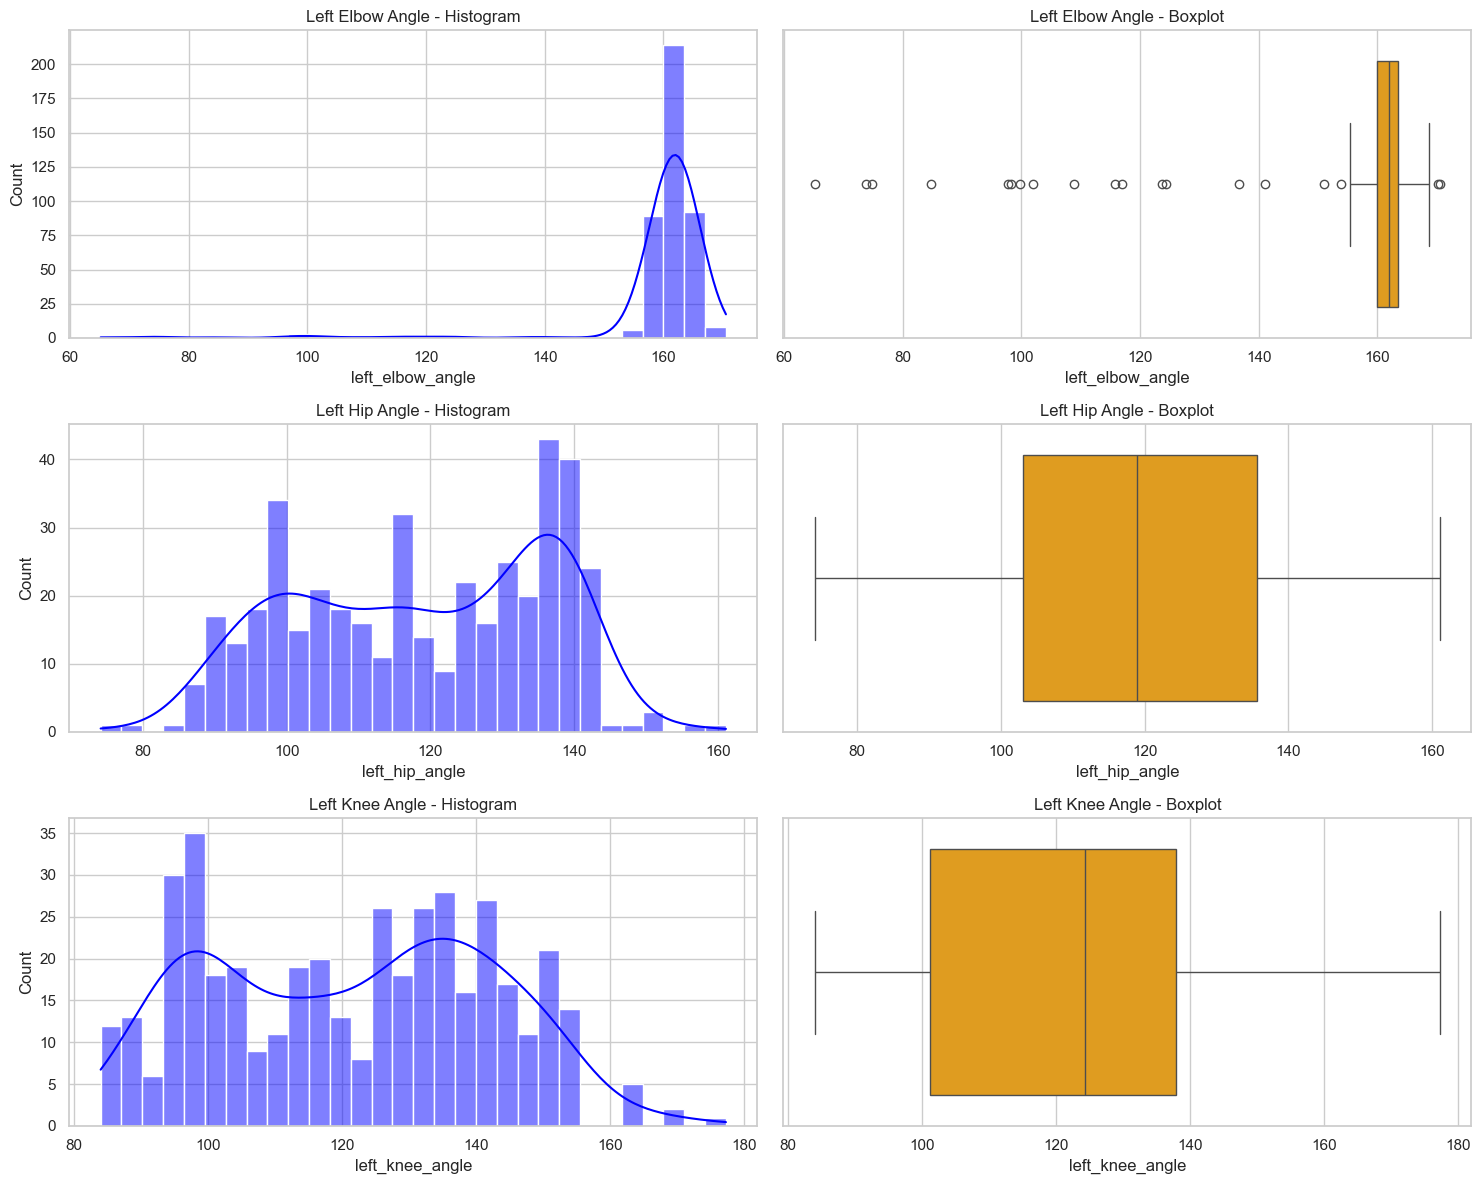

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Excel file
output_file = r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_angles.xlsx"
df = pd.read_excel(output_file)

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 angles × 3 plots

angles = ['left_elbow_angle', 'left_hip_angle', 'left_knee_angle']
titles = ['Left Elbow Angle', 'Left Hip Angle', 'Left Knee Angle']

for i, angle in enumerate(angles):
    # Histogram
    sns.histplot(df[angle], bins=30, kde=True, ax=axes[i, 0], color="blue")
    axes[i, 0].set_title(f'{titles[i]} - Histogram')
    
    # Boxplot
    sns.boxplot(x=df[angle], ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f'{titles[i]} - Boxplot')


# Adjust layout
plt.tight_layout()
plt.show()
